# Plot Monte Carlo quantities

Plot some distributions for mc15 data

In [1]:
from ProfileTools import profiles
from Gaugi.monet.utils import getColor
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from ROOT import TCanvas
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from pprint import pprint
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
SetAtlasStyle()

Welcome to JupyROOT 6.23/01
Using all sub packages with ROOT dependence

Applying ATLAS style settings...


## Fill all histograms:

In [2]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

In [3]:
path = '/Volumes/castor/cern_data/files/Zee/mc15_13TeV.sgn.probes_lhmedium_Zee.bkg.Truth.JF17/'
path+= 'mc15_13TeV.sgn.probes_lhmedium_Zee.bkg.Truth.JF17_et{ET}_eta{ETA}.npz'
paths = [[ path.format(ET=et,ETA=eta) for eta in range(5)] for et in range(5)]  

In [4]:
def generator_for_signal(path):
    from Gaugi import load
    raw = load(path)
    features = raw['features'].tolist()
    data = raw['data']
    target =  raw['target']
    return data[target==1,:], features

In [5]:
from collections import OrderedDict
layers = OrderedDict([ ('PS', 8),
                       ('EM1', 64),
                       ('EM2', 8),
                       ('EM3', 8),
                       ('HAD1', 4),
                       ('HAD2', 4),
                       ('HAD3', 4) ])

def ringParser(idx):
    cTotal = 0
    for key, nRings in layers.items():
        if idx < cTotal+nRings: break
        cTotal += nRings
    return 'Ring_{(%s,%d;%d)} [MeV]' % (key, idx-cTotal, idx)

In [6]:
from ProfileTools import ringLowerEdges, ringHighEdges, ringNBins
from ProfileTools import standardQuantitiesLowerEdges, standardQuantitiesHighEdges, standardQuantitiesNBins
from ProfileTools import electronQuantities

profile = profiles(etbins, etabins)

for key in ['f1','f3','eratio','reta','weta2']:
    profile.add_hist('L2Calo_'+key, standardQuantitiesNBins[key], 
                                     standardQuantitiesLowerEdges[key],
                                     standardQuantitiesHighEdges[key], 
                                     electronQuantities[key]) 
ring = 9
profile.add_hist('L2Calo_ring_%d'%ring, ringNBins[ring], ringLowerEdges[ring],ringHighEdges[ring], ringParser(ring))

In [8]:
hists = profile.fill( generator_for_signal, paths)

Reading... |############################################################| 25/25
Reading... ... finished task in 8.470362s.


## Make some plots:

In [9]:
def PlotHist( hist_list , xlabel, these_fill_colors, these_line_colors, y_axis_maximum=1 ):
    from Gaugi.monet.utils import NormHist
    # Create canvas
    canvas = TCanvas('canvas','canvas',700, 500)

    for idx, hist in enumerate(hist_list):
        h = NormHist(hist)
        h.SetLineColor(these_line_colors[idx])
        h.SetFillColor(these_fill_colors[idx])
        h.SetMaximum(y_axis_maximum)
        AddHistogram(canvas,h, 'same')
    FormatCanvasAxes(canvas, XLabelSize=16, YLabelSize=16, XTitleOffset=0.87, ZLabelSize=16,
                             ZTitleSize=16, YTitleOffset=1.10, ZTitleOffset=1.1)
    SetAxisLabels(canvas,xlabel, 'counts/bin (norm by counts)')
    return canvas

In [10]:
def AddLegend(canvas, x, y, legends):
    MakeLegend( canvas,x,y,x+0.98,y+0.30,textsize=16, names=legends, option = 'f' )

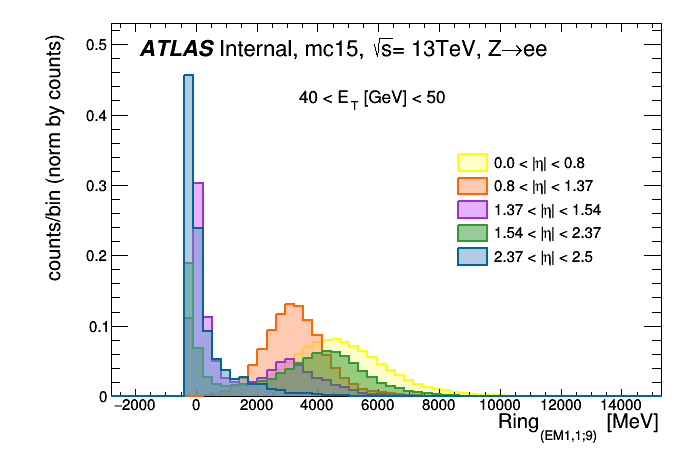

In [14]:

fill_colors = [getColor(color, 0.5) for color in [kYellow-9, kOrange+6, kViolet-4, kGreen-2, kAzure-8] ]
line_colors = [kYellow, kOrange+7, kViolet-5, kGreen-2, kAzure+4]
et_bin = 3
texlabel = profile.get_str_etbin(et_bin)
legends = [ profile.get_str_etabin(idx) for idx in range(5) ]
branch = 'L2Calo_ring_9'
hist_list = [ hists[branch][et_bin][eta_bin] for eta_bin in range(len(etabins)-1) ]
canvas = PlotHist( hist_list, ringParser(9), fill_colors, line_colors,0.53)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, mc15, #sqrt{s}= 13TeV, Z#rightarrowee')
AddTexLabel(canvas, 0.43, 0.78, texlabel, textsize=0.04)
AddLegend( canvas,0.65,0.43, legends)
canvas.Draw()
canvas.SaveAs('L2Calo_ring_9_et3_etaComp.pdf')

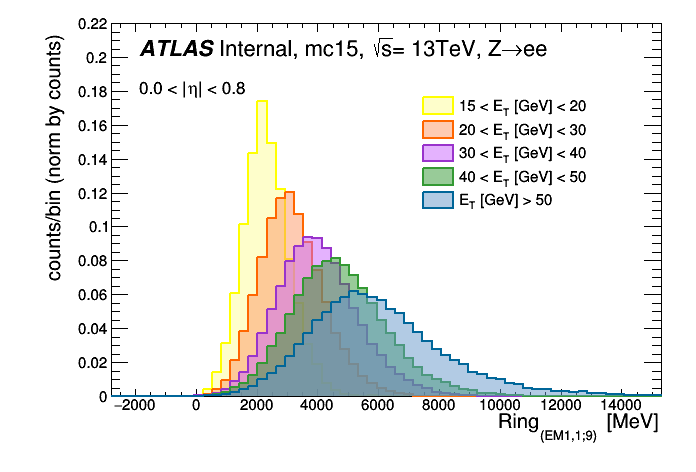

In [16]:
branch = 'L2Calo_ring_9'
eta_bin = 0

fill_colors = [getColor(color, 0.5) for color in [kYellow-9, kOrange+6, kViolet-4, kGreen-2, kAzure-8] ]
line_colors = [kYellow, kOrange+7, kViolet-5, kGreen-2, kAzure+4]
texlabel = profile.get_str_etabin(eta_bin)
legends = [ profile.get_str_etbin(idx) for idx in range(5) ]
legends[-1] = 'E_{T} [GeV] > 50' #Fix latex. For some reason the jupyter is not be able to handle this!
hist_list = [ hists[branch][et_bin][eta_bin] for et_bin in range(len(etbins)-1) ]
canvas = PlotHist( hist_list, ringParser(9), fill_colors, line_colors,0.22)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, mc15, #sqrt{s}= 13TeV, Z#rightarrowee')
AddTexLabel(canvas, 0.2, 0.8, texlabel, textsize=0.04)
AddLegend( canvas,0.6,0.55, legends)
canvas.Draw()
canvas.SaveAs('L2Calo_ring_9_eta0_etComp.pdf')